# POLYNOMIAL REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data Preparation

In [2]:
# Loading the data
salary = pd.read_csv("Position_Salaries.csv")
print(salary)
# No need to split the data into training and test sets because we have few observations
# No need to do any data preprocessing steps: no missing values, no categorical values etc.
# No need to use Position column
# Splitting X's and y's
x = salary.iloc[:,1:-1].values
y = salary.iloc[:,-1].values
print(x)
print(y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Training

## Training the Linear Regression Model on the whole dataset

In [3]:
lin_reg = LinearRegression()
# Training
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Linear Regression Model on the whole dataset

In [4]:
# Creating matrix of the power features (x_poly)
poly = PolynomialFeatures(degree=4)  # n = 4 -> (x1, x1^2,x1^3,x1^4)
x_poly = poly.fit_transform(x)
print(x_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [5]:
# Creating a linear regressor for polynomial regression
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualizing the Linear Regression results

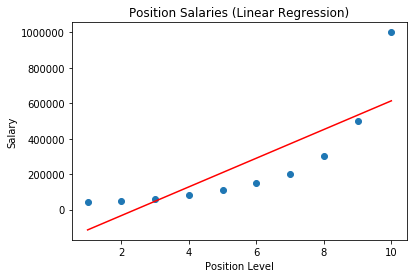

In [6]:
# Predicting with linear regression
lin_pred = lin_reg.predict(x)

# Plotting
plt.scatter(x,y)
plt.plot(x,lin_pred, color ="red")
plt.title('Position Salaries (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Visualizing the Polynomial Regression results

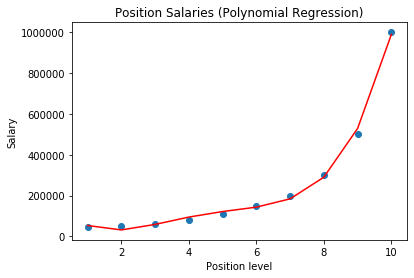

In [7]:
# Predicting with polynomial regression
poly_pred = poly_reg.predict(x_poly)

# Plotting
plt.scatter(x,y)
plt.plot(x,poly_pred, color ="red")
plt.title('Position Salaries (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualizing the polynomial regression results(for higher resolution and smoother curve)

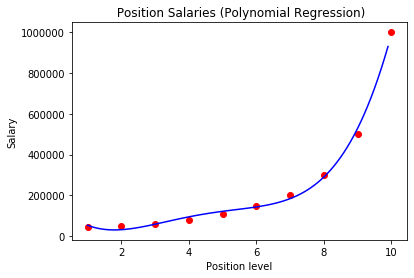

In [8]:
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, poly_reg.predict(poly.fit_transform(X_grid)), color = 'blue')
plt.title(' Position Salaries (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Predicting a new value with Linear Regression

In [9]:
lin_reg.predict([[6.5]])

array([330378.78787879])

# Predicting a new value with Polynomial Regression

In [10]:
poly_reg.predict(poly.fit_transform([[6.5]]))

array([158862.45265153])